In [342]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib .pylab import rcParams
rcParams["figure.figsize"] = 10,6

In [343]:
df_crop = pd.read_excel("Crop-yield-FAO.xlsx")
df_crop = df_crop[["Year","Element","Value"]]
df_crop

Year         Element        Value
0    1961  Area harvested   8639332.00
1    1961           Yield      1681.10
2    1961      Production  14523696.00
3    1962  Area harvested   8855818.00
4    1962           Yield      1514.00
..    ...             ...          ...
184  2022           Yield      5005.30
185  2022      Production  62549531.82
186  2023  Area harvested  12466498.00
187  2023           Yield      5159.90
188  2023      Production  64325662.39

[189 rows x 3 columns]

In [344]:
#function created for transforming datasets
def df_trans(df, year_col = "Year", element_col = "Element", value_col = "Value"):
    df_pivot = df.pivot(index = year_col, columns = element_col, values = value_col)
    
    df_pivot.columns.name = None #removes index name
    df_pivot = df_pivot.reset_index()
    return df_pivot
    

In [345]:
df_crop_trans = df_trans(df_crop, "Year", "Element", "Value")
df_crop_trans

Year  Area harvested   Production   Yield
0   1961       8639332.0  14523696.00  1681.1
1   1962       8855818.0  13408128.00  1514.0
2   1963       9170275.0  16042664.00  1749.4
3   1964       9364054.0  15842004.00  1691.8
4   1965       9492394.0  15852140.00  1670.0
..   ...             ...          ...     ...
58  2019      12302411.0  59185501.11  4810.9
59  2020      12232598.0  59962356.15  4901.8
60  2021      12521054.0  61597969.20  4919.6
61  2022      12496558.0  62549531.82  5005.3
62  2023      12466498.0  64325662.39  5159.9

[63 rows x 4 columns]

In [346]:
#to concatenate two datasets
def df_concat(df1, df2, base_col = "Year"):
    #setting Year column as index
    df1 = df1.set_index(base_col)
    df2 = df2.set_index(base_col)
    #concatenate along columns(axis = 1) and reset index
    data_concat = pd.concat([df1, df2], axis = 1).reset_index()
    return data_concat

In [347]:
df_avg_temp = pd.read_csv("annual-average-temp.csv")
df_avg_temp

Category  Annual Mean  5-yr smooth
0        1901        25.28        25.21
1        1902        25.15        25.17
2        1903        25.27        25.14
3        1904        25.00        25.11
4        1905        24.67        25.08
..        ...          ...          ...
118      2019        25.64        25.58
119      2020        25.40        25.64
120      2021        25.74        25.72
121      2022        25.76        25.80
122      2023        26.00        25.89

[123 rows x 3 columns]

In [348]:
def clean_weather(df, rename_columns = {"old_name" : "new_name"}, drop_column = "column_name", drop_year = (1901,1960)):
    df = df.rename(columns = rename_columns) #rename columns
    df = df.drop(columns = [drop_column])    #drop columns
    df = df[df["Year"] > drop_year[1]]       #drop years
    df = df.reset_index(drop = True)         #resetting index

    return df

In [349]:
df_avg_temp = clean_weather(df_avg_temp, rename_columns = {"Category" : "Year", "Annual Mean" : "Avg Temp"}, drop_column = "5-yr smooth")
df_avg_temp

Year  Avg Temp
0   1961     25.37
1   1962     25.33
2   1963     25.37
3   1964     25.56
4   1965     25.29
..   ...       ...
58  2019     25.64
59  2020     25.40
60  2021     25.74
61  2022     25.76
62  2023     26.00

[63 rows x 2 columns]

In [350]:

df_crop_temp = df_concat(df_crop_trans, df_avg_temp, "Year")
df_crop_temp

Year  Area harvested   Production   Yield  Avg Temp
0   1961       8639332.0  14523696.00  1681.1     25.37
1   1962       8855818.0  13408128.00  1514.0     25.33
2   1963       9170275.0  16042664.00  1749.4     25.37
3   1964       9364054.0  15842004.00  1691.8     25.56
4   1965       9492394.0  15852140.00  1670.0     25.29
..   ...             ...          ...     ...       ...
58  2019      12302411.0  59185501.11  4810.9     25.64
59  2020      12232598.0  59962356.15  4901.8     25.40
60  2021      12521054.0  61597969.20  4919.6     25.74
61  2022      12496558.0  62549531.82  5005.3     25.76
62  2023      12466498.0  64325662.39  5159.9     26.00

[63 rows x 5 columns]

In [351]:
df_max_temp = pd.read_csv("annual-average-max-temp.csv")
df_max_temp

Category  Annual Mean  5-yr smooth
0        1901        30.01        29.89
1        1902        29.93        29.87
2        1903        29.86        29.84
3        1904        29.73        29.82
4        1905        29.27        29.80
..        ...          ...          ...
118      2019        30.35        30.26
119      2020        30.10        30.35
120      2021        30.56        30.45
121      2022        30.47        30.57
122      2023        30.80        30.70

[123 rows x 3 columns]

In [352]:
df_max_temp = clean_weather(df_max_temp, rename_columns = {"Category":"Year", "Annual Mean":"Avg Max Temp"}, drop_column = "5-yr smooth")
df_max_temp

Year  Avg Max Temp
0   1961         30.18
1   1962         30.49
2   1963         30.44
3   1964         30.34
4   1965         30.22
..   ...           ...
58  2019         30.35
59  2020         30.10
60  2021         30.56
61  2022         30.47
62  2023         30.80

[63 rows x 2 columns]

In [353]:
df_crop_temp1 = df_concat(df_crop_temp, df_max_temp, "Year")
df_crop_temp1

Year  Area harvested   Production   Yield  Avg Temp  Avg Max Temp
0   1961       8639332.0  14523696.00  1681.1     25.37         30.18
1   1962       8855818.0  13408128.00  1514.0     25.33         30.49
2   1963       9170275.0  16042664.00  1749.4     25.37         30.44
3   1964       9364054.0  15842004.00  1691.8     25.56         30.34
4   1965       9492394.0  15852140.00  1670.0     25.29         30.22
..   ...             ...          ...     ...       ...           ...
58  2019      12302411.0  59185501.11  4810.9     25.64         30.35
59  2020      12232598.0  59962356.15  4901.8     25.40         30.10
60  2021      12521054.0  61597969.20  4919.6     25.74         30.56
61  2022      12496558.0  62549531.82  5005.3     25.76         30.47
62  2023      12466498.0  64325662.39  5159.9     26.00         30.80

[63 rows x 6 columns]

In [354]:
df_min_temp = pd.read_csv("annual-average-min-temp.csv")
df_min_temp

Category  Annual Mean  5-yr smooth
0        1901        20.60        20.58
1        1902        20.43        20.53
2        1903        20.73        20.49
3        1904        20.31        20.45
4        1905        20.14        20.42
..        ...          ...          ...
118      2019        20.98        20.94
119      2020        20.76        20.98
120      2021        20.98        21.03
121      2022        21.10        21.09
122      2023        21.26        21.14

[123 rows x 3 columns]

In [355]:
df_min_temp = clean_weather(df_min_temp, rename_columns = {"Category":"Year", "Annual Mean":"Avg Min Temp"}, drop_column = "5-yr smooth")
df_min_temp

Year  Avg Min Temp
0   1961         20.62
1   1962         20.23
2   1963         20.34
3   1964         20.84
4   1965         20.40
..   ...           ...
58  2019         20.98
59  2020         20.76
60  2021         20.98
61  2022         21.10
62  2023         21.26

[63 rows x 2 columns]

In [356]:
df_crop_temp2 = df_concat(df_crop_temp1, df_min_temp, "Year")
df_crop_temp2

Year  Area harvested   Production   Yield  Avg Temp  Avg Max Temp  \
0   1961       8639332.0  14523696.00  1681.1     25.37         30.18   
1   1962       8855818.0  13408128.00  1514.0     25.33         30.49   
2   1963       9170275.0  16042664.00  1749.4     25.37         30.44   
3   1964       9364054.0  15842004.00  1691.8     25.56         30.34   
4   1965       9492394.0  15852140.00  1670.0     25.29         30.22   
..   ...             ...          ...     ...       ...           ...   
58  2019      12302411.0  59185501.11  4810.9     25.64         30.35   
59  2020      12232598.0  59962356.15  4901.8     25.40         30.10   
60  2021      12521054.0  61597969.20  4919.6     25.74         30.56   
61  2022      12496558.0  62549531.82  5005.3     25.76         30.47   
62  2023      12466498.0  64325662.39  5159.9     26.00         30.80   

    Avg Min Temp  
0          20.62  
1          20.23  
2          20.34  
3          20.84  
4          20.40  
..           ...  
58         20.98  
59         20.76  
60         20.98  
61         21.10  
62         21.26  

[63 rows x 7 columns]

In [357]:
df_rain = pd.read_csv("annual-precipit.csv")
df_rain = clean_weather(df_rain, rename_columns = {"Category":"Year", "Annual Mean":"Avg Rainfall"}, drop_column = "5-yr smooth")
df_crop_weather = df_concat(df_crop_temp2, df_rain, "Year")
df_crop_weather

Year  Area harvested   Production   Yield  Avg Temp  Avg Max Temp  \
0   1961       8639332.0  14523696.00  1681.1     25.37         30.18   
1   1962       8855818.0  13408128.00  1514.0     25.33         30.49   
2   1963       9170275.0  16042664.00  1749.4     25.37         30.44   
3   1964       9364054.0  15842004.00  1691.8     25.56         30.34   
4   1965       9492394.0  15852140.00  1670.0     25.29         30.22   
..   ...             ...          ...     ...       ...           ...   
58  2019      12302411.0  59185501.11  4810.9     25.64         30.35   
59  2020      12232598.0  59962356.15  4901.8     25.40         30.10   
60  2021      12521054.0  61597969.20  4919.6     25.74         30.56   
61  2022      12496558.0  62549531.82  5005.3     25.76         30.47   
62  2023      12466498.0  64325662.39  5159.9     26.00         30.80   

    Avg Min Temp  Avg Rainfall  
0          20.62       2525.33  
1          20.23       2026.93  
2          20.34       2225.09  
3          20.84       2500.06  
4          20.40       2357.30  
..           ...           ...  
58         20.98       2067.81  
59         20.76       2425.21  
60         20.98       2148.71  
61         21.10       1766.92  
62         21.26       2105.79  

[63 rows x 8 columns]

In [358]:
df_crop_weather.isnull().sum()

Year              0
Area harvested    0
Production        0
Yield             0
Avg Temp          0
Avg Max Temp      0
Avg Min Temp      0
Avg Rainfall      0
dtype: int64

In [359]:
df_crop_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            63 non-null     int64  
 1   Area harvested  63 non-null     float64
 2   Production      63 non-null     float64
 3   Yield           63 non-null     float64
 4   Avg Temp        63 non-null     float64
 5   Avg Max Temp    63 non-null     float64
 6   Avg Min Temp    63 non-null     float64
 7   Avg Rainfall    63 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [360]:
df_crop_weather.describe()

Year  Area harvested    Production        Yield   Avg Temp  \
count    63.000000    6.300000e+01  6.300000e+01    63.000000  63.000000   
mean   1992.000000    1.098701e+07  3.294166e+07  2908.184127  25.586190   
std      18.330303    9.676378e+05  1.582296e+07  1175.942357   0.317253   
min    1961.000000    8.639332e+06  1.340813e+07  1514.000000  24.810000   
25%    1976.500000    1.039740e+07  1.949058e+07  1851.250000  25.370000   
50%    1992.000000    1.103688e+07  2.788621e+07  2585.800000  25.560000   
75%    2007.500000    1.173729e+07  4.689405e+07  4061.700000  25.765000   
max    2023.000000    1.252105e+07  6.432566e+07  5159.900000  26.500000   

       Avg Max Temp  Avg Min Temp  Avg Rainfall  
count     63.000000     63.000000     63.000000  
mean      30.362698     20.859524   2260.037619  
std        0.339498      0.349412    270.449600  
min       29.590000     20.080000   1641.440000  
25%       30.120000     20.600000   2085.385000  
50%       30.370000     20.850000   2232.990000  
75%       30.555000     21.130000   2495.380000  
max       31.460000     21.620000   2773.070000

**Now lets add some more feature to this dataframe**
For this, I knocked the door of World Bank and they came up with some messy spreadsheet!

In [362]:
df_fert_land = pd.read_csv("fert__cropland_wb.csv")
df_fert_land

Country Name Country Code  \
0                                        Bangladesh          BGD   
1                                        Bangladesh          BGD   
2                                        Bangladesh          BGD   
3                                        Bangladesh          BGD   
4                                        Bangladesh          BGD   
5                                               NaN          NaN   
6                                               NaN          NaN   
7                                               NaN          NaN   
8  Data from database: World Development Indicators          NaN   
9                          Last Updated: 01/28/2025          NaN   

                                         Series Name     Series Code  \
0  Fertilizer consumption (kilograms per hectare ...  AG.CON.FERT.ZS   
1            Land under cereal production (hectares)  AG.LND.CREL.HA   
2                Permanent cropland (% of land area)  AG.LND.CROP.ZS   
3  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   
4  Prevalence of severe food insecurity in the po...  SN.ITK.SVFI.ZS   
5                                                NaN             NaN   
6                                                NaN             NaN   
7                                                NaN             NaN   
8                                                NaN             NaN   
9                                                NaN             NaN   

      1961 [YR1961]     1962 [YR1962]     1963 [YR1963]     1964 [YR1964]  \
0  2.61475886112725  3.14063045248342  5.69436374201046  5.20833333333333   
1           8639332           8855818           9170275           9364054   
2  2.11262195590382  2.15103326419298  2.11262195590382  2.15103326419298   
3                ..                ..                ..                ..   
4                ..                ..                ..                ..   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
8               NaN               NaN               NaN               NaN   
9               NaN               NaN               NaN               NaN   

      1965 [YR1965]     1966 [YR1966]  ...     2014 [YR2014] 2015 [YR2015]  \
0  6.17523071664578  8.61559445328484  ...  278.132224964281  2.978109e+02   
1           9492394           9208509  ...          12165112  1.215637e+07   
2  1.99738803103634  1.93592993777368  ...  6.14580932626565  6.145809e+00   
3                ..                ..  ...                ..  3.220000e+01   
4                ..                ..  ...                ..  1.330000e+01   
5               NaN               NaN  ...               NaN           NaN   
6               NaN               NaN  ...               NaN           NaN   
7               NaN               NaN  ...               NaN           NaN   
8               NaN               NaN  ...               NaN           NaN   
9               NaN               NaN  ...               NaN           NaN   

  2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020]  \
0  2.882884e+02  3.025427e+02  3.184669e+02  3.204455e+02  3.253866e+02   
1  1.179360e+07  1.243000e+07  1.227857e+07  1.230241e+07  1.223260e+07   
2  6.145809e+00  6.145809e+00  6.376277e+00  7.221326e+00  7.221326e+00   
3  3.190000e+01  3.150000e+01  3.150000e+01  3.190000e+01  3.170000e+01   
4  1.240000e+01  1.160000e+01  1.060000e+01  1.050000e+01  1.070000e+01   
5           NaN           NaN           NaN           NaN           NaN   
6           NaN           NaN           NaN           NaN           NaN   
7           NaN           NaN           NaN           NaN           NaN   
8           NaN           NaN           NaN           NaN           NaN   
9           NaN           NaN           

Oh no! This super-messy dataset needs to be handled with care! It has years on their columns!
Lets clean it.

In [364]:
#step-1: lets remove unnecessary columns
df_fert_land = df_fert_land.drop(columns=["Country Name", "Country Code", "Series Code"])
df_fert_land

Series Name     1961 [YR1961]  \
0  Fertilizer consumption (kilograms per hectare ...  2.61475886112725   
1            Land under cereal production (hectares)           8639332   
2                Permanent cropland (% of land area)  2.11262195590382   
3  Prevalence of moderate or severe food insecuri...                ..   
4  Prevalence of severe food insecurity in the po...                ..   
5                                                NaN               NaN   
6                                                NaN               NaN   
7                                                NaN               NaN   
8                                                NaN               NaN   
9                                                NaN               NaN   

      1962 [YR1962]     1963 [YR1963]     1964 [YR1964]     1965 [YR1965]  \
0  3.14063045248342  5.69436374201046  5.20833333333333  6.17523071664578   
1           8855818           9170275           9364054           9492394   
2  2.15103326419298  2.11262195590382  2.15103326419298  1.99738803103634   
3                ..                ..                ..                ..   
4                ..                ..                ..                ..   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
8               NaN               NaN               NaN               NaN   
9               NaN               NaN               NaN               NaN   

      1966 [YR1966]     1967 [YR1967]     1968 [YR1968]     1969 [YR1969]  \
0  8.61559445328484  10.8560443288477  12.2324159021407  14.7219069239501   
1           9208509          10036709           9931197          10545400   
2  1.93592993777368  1.93592993777368   1.8437427978797   2.0357993393255   
3                ..                ..                ..                ..   
4                ..                ..                ..                ..   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
8               NaN               NaN               NaN               NaN   
9               NaN               NaN               NaN               NaN   

   ...     2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
0  ...  278.132224964281  2.978109e+02  2.882884e+02  3.025427e+02   
1  ...          12165112  1.215637e+07  1.179360e+07  1.243000e+07   
2  ...  6.14580932626565  6.145809e+00  6.145809e+00  6.145809e+00   
3  ...                ..  3.220000e+01  3.190000e+01  3.150000e+01   
4  ...                ..  1.330000e+01  1.240000e+01  1.160000e+01   
5  ...               NaN           NaN           NaN           NaN   
6  ...               NaN           NaN           NaN           NaN   
7  ...               NaN           NaN           NaN           NaN   
8  ...               NaN           NaN           NaN           NaN   
9  ...               NaN           NaN           NaN           NaN   

  2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022]  \
0  3.184669e+02  3.204455e+02  3.253866e+02  3.955242e+02  3.909012e+02   
1  1.227857e+07  1.230241e+07  1.223260e+07  1.252105e+07  1.249656e+07   
2  6.376277e+00  7.221326e+00  7.221326e+00  7.221326e+00  7.221326e+00   
3  3.150000e+01  3.190000e+01  3.170000e+01  3.110000e+01  3.050000e+01   
4  1.060000e+01  1.050000e+01  1.070000e+01  1.100000e+01  1.140000e+01   
5           NaN           NaN           NaN           NaN           NaN   
6           NaN           NaN           NaN           NaN           NaN   
7           NaN           NaN           NaN           NaN           NaN   
8           NaN           NaN           NaN           NaN           NaN   
9        

In [365]:
#step-2: Fix column names.who such weird names! First we need to check if the column names are all strings or not!

df_fert_land.dtypes

Series Name       object
1961 [YR1961]     object
1962 [YR1962]     object
1963 [YR1963]     object
1964 [YR1964]     object
                  ...   
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]     object
Length: 64, dtype: object

In [366]:
df_fert_land.columns = [str(col).split(" ")[0] if "YR" in str(col) else str(col) for col in df_fert_land.columns]
df_fert_land

Series Name              1961  \
0  Fertilizer consumption (kilograms per hectare ...  2.61475886112725   
1            Land under cereal production (hectares)           8639332   
2                Permanent cropland (% of land area)  2.11262195590382   
3  Prevalence of moderate or severe food insecuri...                ..   
4  Prevalence of severe food insecurity in the po...                ..   
5                                                NaN               NaN   
6                                                NaN               NaN   
7                                                NaN               NaN   
8                                                NaN               NaN   
9                                                NaN               NaN   

               1962              1963              1964              1965  \
0  3.14063045248342  5.69436374201046  5.20833333333333  6.17523071664578   
1           8855818           9170275           9364054           9492394   
2  2.15103326419298  2.11262195590382  2.15103326419298  1.99738803103634   
3                ..                ..                ..                ..   
4                ..                ..                ..                ..   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
8               NaN               NaN               NaN               NaN   
9               NaN               NaN               NaN               NaN   

               1966              1967              1968              1969  \
0  8.61559445328484  10.8560443288477  12.2324159021407  14.7219069239501   
1           9208509          10036709           9931197          10545400   
2  1.93592993777368  1.93592993777368   1.8437427978797   2.0357993393255   
3                ..                ..                ..                ..   
4                ..                ..                ..                ..   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
8               NaN               NaN               NaN               NaN   
9               NaN               NaN               NaN               NaN   

   ...              2014          2015          2016          2017  \
0  ...  278.132224964281  2.978109e+02  2.882884e+02  3.025427e+02   
1  ...          12165112  1.215637e+07  1.179360e+07  1.243000e+07   
2  ...  6.14580932626565  6.145809e+00  6.145809e+00  6.145809e+00   
3  ...                ..  3.220000e+01  3.190000e+01  3.150000e+01   
4  ...                ..  1.330000e+01  1.240000e+01  1.160000e+01   
5  ...               NaN           NaN           NaN           NaN   
6  ...               NaN           NaN           NaN           NaN   
7  ...               NaN           NaN           NaN           NaN   
8  ...               NaN           NaN           NaN           NaN   
9  ...               NaN           NaN           NaN           NaN   

           2018          2019          2020          2021          2022 2023  
0  3.184669e+02  3.204455e+02  3.253866e+02  3.955242e+02  3.909012e+02   ..  
1  1.227857e+07  1.230241e+07  1.223260e+07  1.252105e+07  1.249656e+07   ..  
2  6.376277e+00  7.221326e+00  7.221326e+00  7.221326e+00  7.221326e+00   ..  
3  3.150000e+01  3.190000e+01  3.170000e+01  3.110000e+01  3.050000e+01   ..  
4  1.060000e+01  1.050000e+01  1.070000e+01  1.100000e+01  1.140000e+01   ..  
5           NaN           NaN           NaN           NaN           NaN  NaN  
6           NaN           NaN           NaN           NaN           NaN  NaN  
7           NaN           NaN           NaN           NaN           NaN  NaN  
8           NaN           NaN           NaN     

In [367]:
#step-3: convert wide formats to long formats. 
#I mean this creepy columns names of years will be turned to rows

df_fert_land = df_fert_land.melt(id_vars=["Series Name"], var_name="Year", value_name="Value")

df_fert_land

Series Name  Year             Value
0    Fertilizer consumption (kilograms per hectare ...  1961  2.61475886112725
1              Land under cereal production (hectares)  1961           8639332
2                  Permanent cropland (% of land area)  1961  2.11262195590382
3    Prevalence of moderate or severe food insecuri...  1961                ..
4    Prevalence of severe food insecurity in the po...  1961                ..
..                                                 ...   ...               ...
625                                                NaN  2023               NaN
626                                                NaN  2023               NaN
627                                                NaN  2023               NaN
628                                                NaN  2023               NaN
629                                                NaN  2023               NaN

[630 rows x 3 columns]

ok!ok! It's coming in shape.

In [369]:
#step-4: reshape
#series names will be turned into column names
# Convert Value column to numeric
df_fert_land["Value"] = pd.to_numeric(df_fert_land["Value"], errors="coerce")

# Perform pivot_table operation
df_fert_land = df_fert_land.pivot_table(
    index="Year", columns="Series Name", values="Value", aggfunc="mean"
).reset_index()
df_fert_land

Series Name  Year  \
0            1961   
1            1962   
2            1963   
3            1964   
4            1965   
..            ...   
57           2018   
58           2019   
59           2020   
60           2021   
61           2022   

Series Name  Fertilizer consumption (kilograms per hectare of arable land)  \
0                                                     2.614759               
1                                                     3.140630               
2                                                     5.694364               
3                                                     5.208333               
4                                                     6.175231               
..                                                         ...               
57                                                  318.466863               
58                                                  320.445463               
59                                                  325.386565               
60                                                  395.524245               
61                                                  390.901244               

Series Name  Land under cereal production (hectares)  \
0                                          8639332.0   
1                                          8855818.0   
2                                          9170275.0   
3                                          9364054.0   
4                                          9492394.0   
..                                               ...   
57                                        12278572.0   
58                                        12302411.0   
59                                        12232598.0   
60                                        12521054.0   
61                                        12496558.0   

Series Name  Permanent cropland (% of land area)  \
0                                       2.112622   
1                                       2.151033   
2                                       2.112622   
3                                       2.151033   
4                                       1.997388   
..                                           ...   
57                                      6.376277   
58                                      7.221326   
59                                      7.221326   
60                                      7.221326   
61                                      7.221326   

Series Name  Prevalence of moderate or severe food insecurity in the population (%)  \
0                                                          NaN                        
1                                                          NaN                        
2                                                          NaN                        
3                                                          NaN                        
4                                                          NaN                        
..                                                         ...                        
57                                                        31.5                        
58                                                        31.9                        
59                                                        31.7                        
60                                                        31.1                        
61                                                        30.5                        

Series Name  Prevalence of severe food insecurity in the population (%)  
0                                                          NaN           
1                                                          NaN           
2                                                          NaN           
3                                                          NaN           
4                                                          NaN           
..                     

In [370]:
df_fert_land = df_fert_land.drop(columns = ["Prevalence of moderate or severe food insecurity in the population (%)", "Prevalence of severe food insecurity in the population (%)","Land under cereal production (hectares)"])
df_fert_land

Series Name  Year  \
0            1961   
1            1962   
2            1963   
3            1964   
4            1965   
..            ...   
57           2018   
58           2019   
59           2020   
60           2021   
61           2022   

Series Name  Fertilizer consumption (kilograms per hectare of arable land)  \
0                                                     2.614759               
1                                                     3.140630               
2                                                     5.694364               
3                                                     5.208333               
4                                                     6.175231               
..                                                         ...               
57                                                  318.466863               
58                                                  320.445463               
59                                                  325.386565               
60                                                  395.524245               
61                                                  390.901244               

Series Name  Permanent cropland (% of land area)  
0                                       2.112622  
1                                       2.151033  
2                                       2.112622  
3                                       2.151033  
4                                       1.997388  
..                                           ...  
57                                      6.376277  
58                                      7.221326  
59                                      7.221326  
60                                      7.221326  
61                                      7.221326  

[62 rows x 3 columns]

In [371]:
df_fert_land.set_index("Year")
df_fert_land.columns.name = None
df_fert_land 

Year  Fertilizer consumption (kilograms per hectare of arable land)  \
0   1961                                           2.614759               
1   1962                                           3.140630               
2   1963                                           5.694364               
3   1964                                           5.208333               
4   1965                                           6.175231               
..   ...                                                ...               
57  2018                                         318.466863               
58  2019                                         320.445463               
59  2020                                         325.386565               
60  2021                                         395.524245               
61  2022                                         390.901244               

    Permanent cropland (% of land area)  
0                              2.112622  
1                              2.151033  
2                              2.112622  
3                              2.151033  
4                              1.997388  
..                                  ...  
57                             6.376277  
58                             7.221326  
59                             7.221326  
60                             7.221326  
61                             7.221326  

[62 rows x 3 columns]

In [372]:
df_fert_land = df_fert_land.rename(columns = {"Fertilizer consumption (kilograms per hectare of arable land)": "Fert_con", "Permanent cropland (% of land area)":"Cropland_percent"})

In [373]:
df_fert_land

Year    Fert_con  Cropland_percent
0   1961    2.614759          2.112622
1   1962    3.140630          2.151033
2   1963    5.694364          2.112622
3   1964    5.208333          2.151033
4   1965    6.175231          1.997388
..   ...         ...               ...
57  2018  318.466863          6.376277
58  2019  320.445463          7.221326
59  2020  325.386565          7.221326
60  2021  395.524245          7.221326
61  2022  390.901244          7.221326

[62 rows x 3 columns]

In [374]:
 #mean values for 2023 (last 3 years' average)
fertilizer_mean = df_fert_land["Fert_con"].tail(3).mean()
cropland_mean = df_fert_land["Cropland_percent"].tail(3).mean()

# a new row as a DataFrame 
row_2023 = pd.DataFrame({"Year": [2023], "Fert_con": [fertilizer_mean], "Cropland_percent": [cropland_mean]})

#  Append the new row 
df_fert_land = pd.concat([df_fert_land, row_2023], ignore_index=True)
df_fert_land


Year    Fert_con  Cropland_percent
0   1961    2.614759          2.112622
1   1962    3.140630          2.151033
2   1963    5.694364          2.112622
3   1964    5.208333          2.151033
4   1965    6.175231          1.997388
..   ...         ...               ...
58  2019  320.445463          7.221326
59  2020  325.386565          7.221326
60  2021  395.524245          7.221326
61  2022  390.901244          7.221326
62  2023  370.604018          7.221326

[63 rows x 3 columns]

In [375]:
df_fert_land.isnull().sum()

Year                0
Fert_con            0
Cropland_percent    0
dtype: int64

In [376]:
print(df_fert_land["Year"].dtype)
print(df_crop_weather["Year"].dtype)


object
int64


**Ohho! That's the culprit!**
I spent hours on this shit! It was concatenating row-wise instead of column-wise!

In [378]:
#make all year data as object type
df_fert_land["Year"] = df_fert_land["Year"].astype(int)
df_crop_weather["Year"] = df_crop_weather["Year"].astype(int)

In [379]:
df = df_concat(df_crop_weather, df_fert_land, "Year")
df.set_index("Year", inplace = True)
df.index = pd.to_datetime(df.index, format='%Y')
df

Area harvested   Production   Yield  Avg Temp  Avg Max Temp  \
Year                                                                      
1961-01-01       8639332.0  14523696.00  1681.1     25.37         30.18   
1962-01-01       8855818.0  13408128.00  1514.0     25.33         30.49   
1963-01-01       9170275.0  16042664.00  1749.4     25.37         30.44   
1964-01-01       9364054.0  15842004.00  1691.8     25.56         30.34   
1965-01-01       9492394.0  15852140.00  1670.0     25.29         30.22   
...                    ...          ...     ...       ...           ...   
2019-01-01      12302411.0  59185501.11  4810.9     25.64         30.35   
2020-01-01      12232598.0  59962356.15  4901.8     25.40         30.10   
2021-01-01      12521054.0  61597969.20  4919.6     25.74         30.56   
2022-01-01      12496558.0  62549531.82  5005.3     25.76         30.47   
2023-01-01      12466498.0  64325662.39  5159.9     26.00         30.80   

            Avg Min Temp  Avg Rainfall    Fert_con  Cropland_percent  
Year                                                                  
1961-01-01         20.62       2525.33    2.614759          2.112622  
1962-01-01         20.23       2026.93    3.140630          2.151033  
1963-01-01         20.34       2225.09    5.694364          2.112622  
1964-01-01         20.84       2500.06    5.208333          2.151033  
1965-01-01         20.40       2357.30    6.175231          1.997388  
...                  ...           ...         ...               ...  
2019-01-01         20.98       2067.81  320.445463          7.221326  
2020-01-01         20.76       2425.21  325.386565          7.221326  
2021-01-01         20.98       2148.71  395.524245          7.221326  
2022-01-01         21.10       1766.92  390.901244          7.221326  
2023-01-01         21.26       2105.79  370.604018          7.221326  

[63 rows x 9 columns]

This dataset combines data for Bangladesh from 1961 to 2023 retrieved from FAO & WB.

Area harvested = Area harvested for primary cereals in hactor 

Production =	Primary cereals produced in tons

Yield =	Production/Area harvested (in kg/ha)

Avg Temp	= Average Temperature of that year in Celsius

Avg Max Temp =	Average Maximum Temperature of that year in Celsius

Avg Min Temp	= Average Minimum Temperature of that year in Celsius

Avg Rainfall	= Average precipitation of that year in mm

Fert_con	= Fertilizer Consumption in kg/ha

Cropland_percent = % of land as cropland

Year			=	Year recorded					

In [382]:
df1 = df.loc[:, ["Production"]]
df1

Production
Year                   
1961-01-01  14523696.00
1962-01-01  13408128.00
1963-01-01  16042664.00
1964-01-01  15842004.00
1965-01-01  15852140.00
...                 ...
2019-01-01  59185501.11
2020-01-01  59962356.15
2021-01-01  61597969.20
2022-01-01  62549531.82
2023-01-01  64325662.39

[63 rows x 1 columns]

In [383]:
df1["Production"] = df1["Production"]/10000000
df1

Production
Year                  
1961-01-01    1.452370
1962-01-01    1.340813
1963-01-01    1.604266
1964-01-01    1.584200
1965-01-01    1.585214
...                ...
2019-01-01    5.918550
2020-01-01    5.996236
2021-01-01    6.159797
2022-01-01    6.254953
2023-01-01    6.432566

[63 rows x 1 columns]

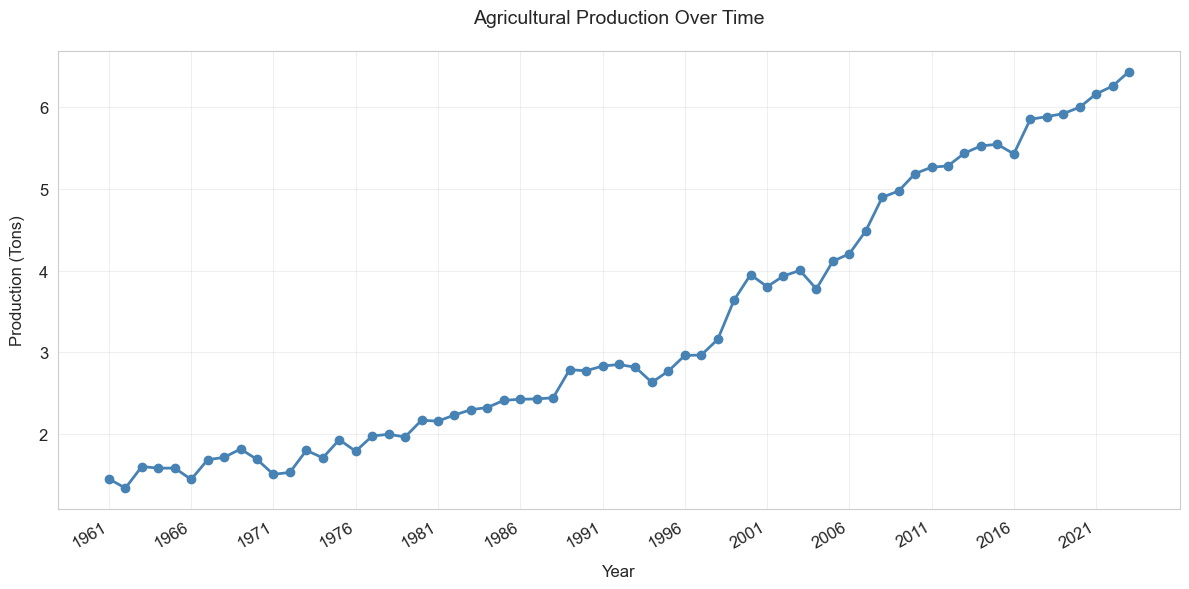

In [541]:
df1.index = pd.to_datetime(df1.index)

plt.figure(figsize=(12, 6))
plt.plot(df1, 
         marker='o', linestyle='-', color='steelblue', linewidth=2)

# Formatting
plt.title('Agricultural Production Over Time', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Production (Tons)', fontsize=12, labelpad=10)
plt.grid(True, alpha=0.3)

# Format x-axis to show years clearly
plt.xticks(
    ticks=df1.index[::5],  # Show every 5th year
    labels=df1.index.year[::5],  # Extract year from datetime index
    rotation=30,
    ha='right'
)

plt.tight_layout()
plt.show()

In [385]:
#rolling statistics
rolmean = df1.rolling(window = 5).mean()
rolstd = df1.rolling(window = 5).std()

print(rolmean,rolstd)

            Production
Year                  
1961-01-01         NaN
1962-01-01         NaN
1963-01-01         NaN
1964-01-01         NaN
1965-01-01    1.513373
...                ...
2019-01-01    5.723966
2020-01-01    5.814446
2021-01-01    5.961159
2022-01-01    6.042238
2023-01-01    6.152420

[63 rows x 1 columns]             Production
Year                  
1961-01-01         NaN
1962-01-01         NaN
1963-01-01         NaN
1964-01-01         NaN
1965-01-01    0.113949
...                ...
2019-01-01    0.223380
2020-01-01    0.223801
2021-01-01    0.123772
2022-01-01    0.159899
2023-01-01    0.205023

[63 rows x 1 columns]


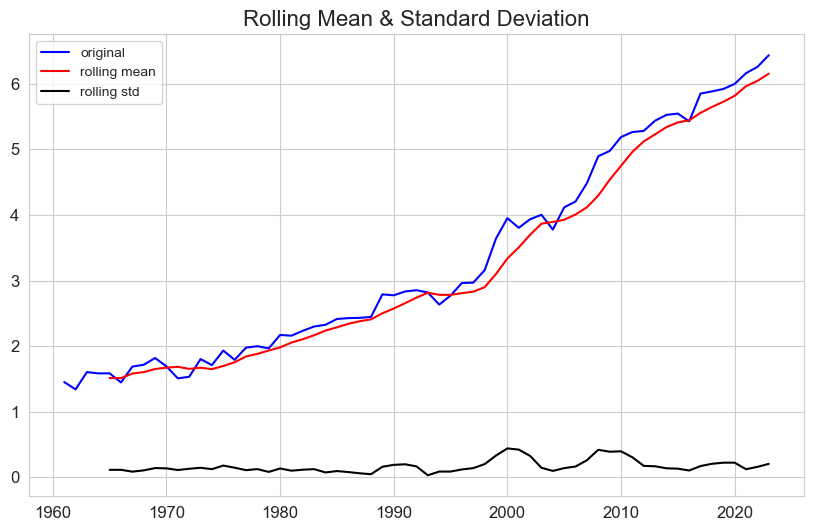

In [386]:
#plot rolling stats
orig = plt.plot(df1, color = "blue", label = "original")
mean = plt.plot(rolmean, color = "red", label = "rolling mean")
std = plt.plot(rolstd, color = "black", label = "rolling std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block = False)

In [387]:
# perform Augmented Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller
print("Results of ADF:")
adf = adfuller(df1["Production"], autolag = "AIC")

adfout = pd.Series(adf[0:4], index = ["Test Statistics", "p-value", "#Lags Used", "Number of observations used"])
for key, value in adf[4].items():
    adfout["Critical Value(%s) "%key] = value

print(adfout)


Results of ADF:
Test Statistics                 1.371191
p-value                         0.996979
#Lags Used                      0.000000
Number of observations used    62.000000
Critical Value(1%)             -3.540523
Critical Value(5%)             -2.909427
Critical Value(10%)            -2.592314
dtype: float64


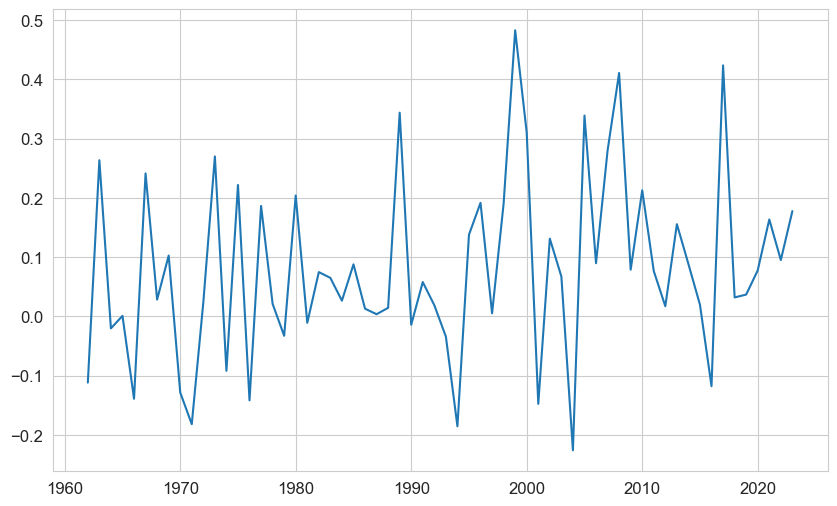

In [388]:
#remove stationarity
#1st differencing
df1_diff = df1.diff()
plt.plot(df1_diff)

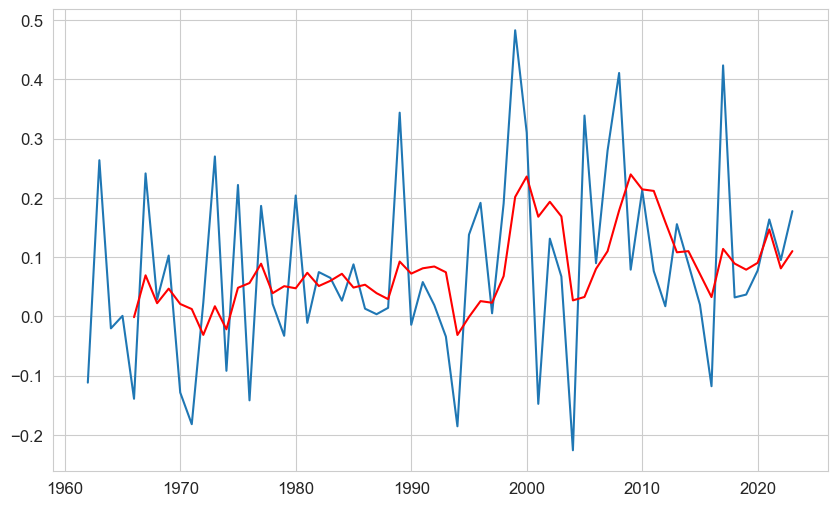

In [389]:
movingAvg = df1_diff.rolling(window = 5).mean()
movingSTD = df1_diff.rolling(window = 5).std()
plt.plot(df1_diff)
plt.plot(movingAvg, color = "red")

In [390]:
df1_diff = df1_diff.dropna()

df1_diff

Production
Year                  
1962-01-01   -0.111557
1963-01-01    0.263454
1964-01-01   -0.020066
1965-01-01    0.001014
1966-01-01   -0.138784
...                ...
2019-01-01    0.036898
2020-01-01    0.077686
2021-01-01    0.163561
2022-01-01    0.095156
2023-01-01    0.177613

[62 rows x 1 columns]

In [391]:
diff_minus_avg = df1_diff - movingAvg
diff_minus_avg.head(12)

#remove nan values
diff_minus_avg.dropna(inplace=True)
diff_minus_avg.head(10)

Production
Year                  
1966-01-01   -0.137596
1967-01-01    0.171849
1968-01-01    0.006011
1969-01-01    0.055829
1970-01-01   -0.149280
1971-01-01   -0.194125
1972-01-01    0.054524
1973-01-01    0.252568
1974-01-01   -0.069970
1975-01-01    0.173368

p value is greater than 0.05 and Test Statistics is larger than critical value at 5%.
So, null hypothesis(The data is non-stationary) is failed to be rejected.
So, data is non-stationary

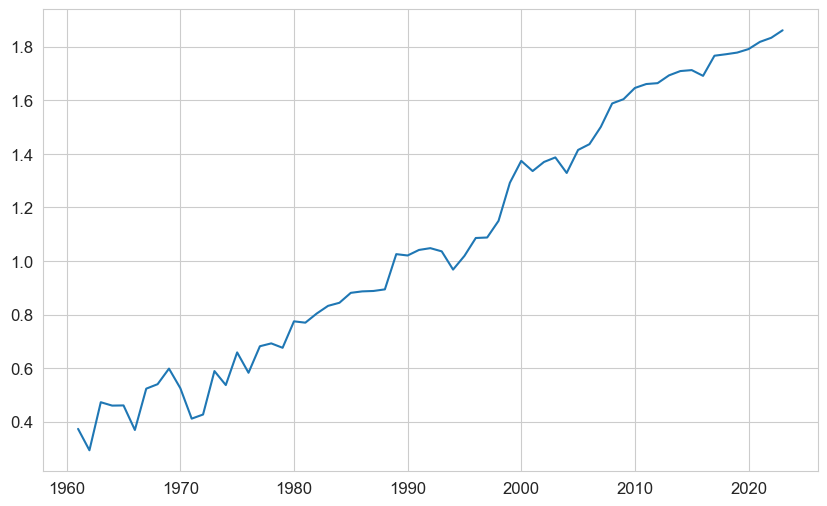

In [393]:
#estimating trend
df1_logscale = np.log(df1)
plt.plot(df1_logscale)

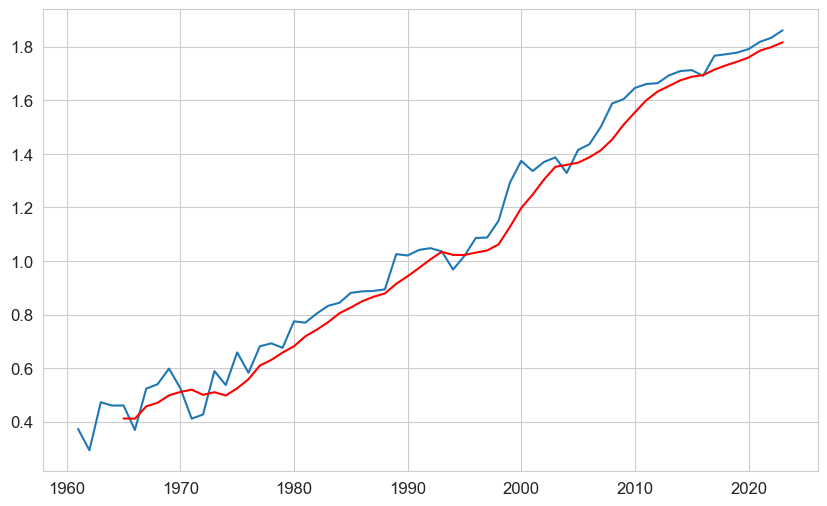

In [394]:
movingAvg = df1_logscale.rolling(window = 5).mean()
movingSTD = df1_logscale.rolling(window = 5).std()
plt.plot(df1_logscale)
plt.plot(movingAvg, color = "red")

In [395]:
log_minus_avg = df1_logscale - movingAvg
log_minus_avg.head(12)

#remove nan values
log_minus_avg.dropna(inplace=True)
log_minus_avg.head(10)

Production
Year                  
1965-01-01    0.048732
1966-01-01   -0.042070
1967-01-01    0.066154
1968-01-01    0.069352
1969-01-01    0.099885
1970-01-01    0.013915
1971-01-01   -0.108204
1972-01-01   -0.073466
1973-01-01    0.078913
1974-01-01    0.039009

In [396]:
#define a function for adf test. It will come handy
def test_stationarity(timeseries):
    #rolling stats
    movingAvg = timeseries.rolling(window = 5).mean()
    movingSTD = timeseries.rolling(window = 5).std()

    #plot rolling stat
    
    orig = plt.plot(timeseries, color = "blue", label = "original")
    mean = plt.plot(movingAvg, color = "red", label = "rolling mean")
    std = plt.plot(movingSTD, color = "black", label = "rolling std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block = False)

    # perform Augmented Dicky-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print("Results of ADF:")
    adf = adfuller(timeseries, autolag = "AIC")
    
    adfout = pd.Series(adf[0:4], index = ["Test Statistics", "p-value", "#Lags Used", "Number of observations used"])
    for key, value in adf[4].items():
        adfout["Critical Value(%s)" %key] = value
    
    print(adfout)


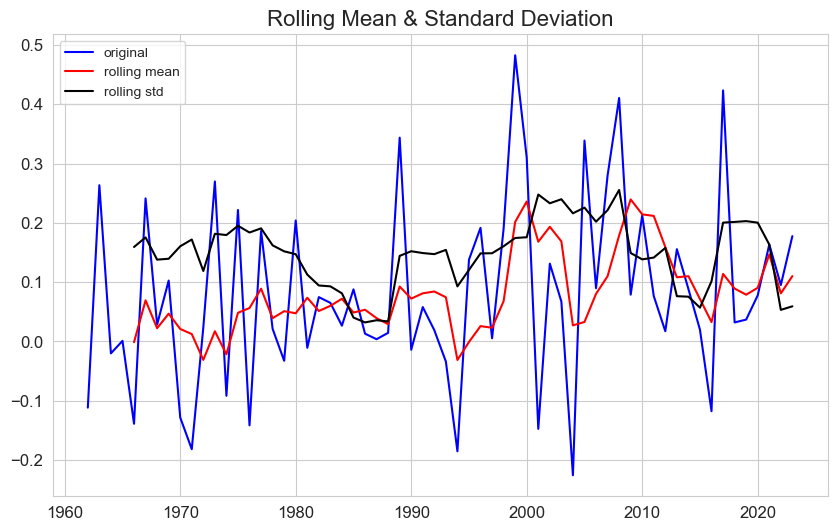

Results of ADF:
Test Statistics               -8.764491e+00
p-value                        2.619891e-14
#Lags Used                     0.000000e+00
Number of observations used    6.100000e+01
Critical Value(1%)            -3.542413e+00
Critical Value(5%)            -2.910236e+00
Critical Value(10%)           -2.592745e+00
dtype: float64


In [397]:
test_stationarity(df1_diff)

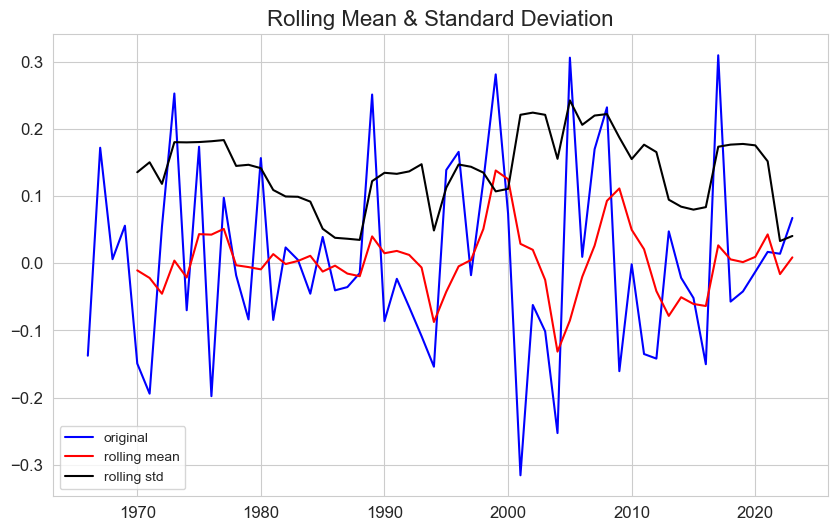

Results of ADF:
Test Statistics               -5.819814e+00
p-value                        4.208626e-07
#Lags Used                     5.000000e+00
Number of observations used    5.200000e+01
Critical Value(1%)            -3.562879e+00
Critical Value(5%)            -2.918973e+00
Critical Value(10%)           -2.597393e+00
dtype: float64


In [398]:
test_stationarity(diff_minus_avg)

In [399]:
df1_diff

Production
Year                  
1962-01-01   -0.111557
1963-01-01    0.263454
1964-01-01   -0.020066
1965-01-01    0.001014
1966-01-01   -0.138784
...                ...
2019-01-01    0.036898
2020-01-01    0.077686
2021-01-01    0.163561
2022-01-01    0.095156
2023-01-01    0.177613

[62 rows x 1 columns]

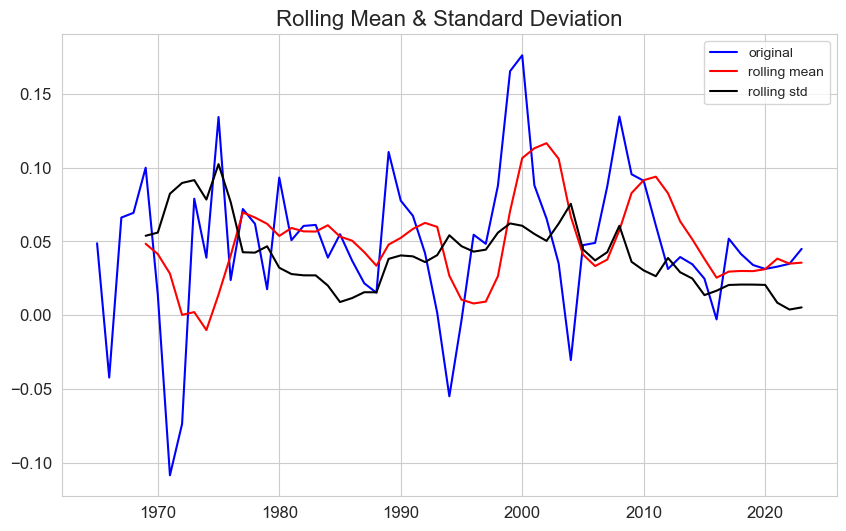

Results of ADF:
Test Statistics                -4.709498
p-value                         0.000081
#Lags Used                      3.000000
Number of observations used    55.000000
Critical Value(1%)             -3.555273
Critical Value(5%)             -2.915731
Critical Value(10%)            -2.595670
dtype: float64


In [400]:
test_stationarity(log_minus_avg)

p value is significant and test stat is less than critical value at 5%

Data is now stationary and shows no trend

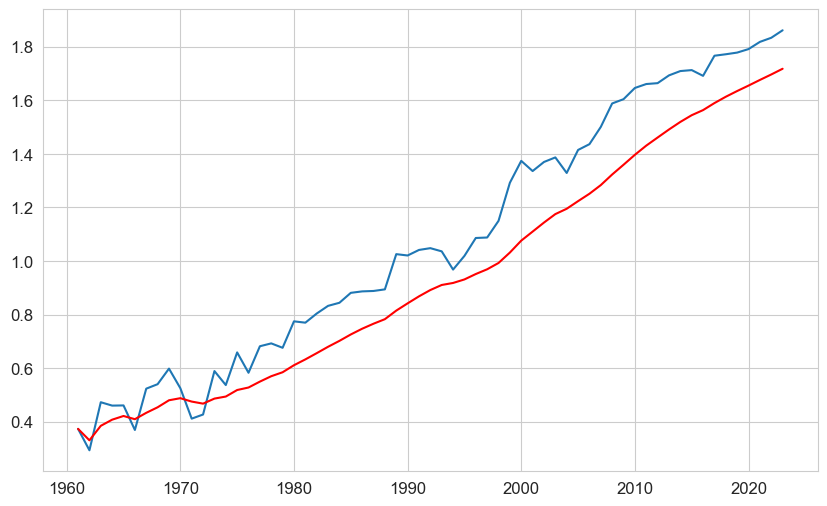

In [403]:
expDecayWeightedAvg = df1_logscale.ewm(halflife = 5, min_periods = 0, adjust = True).mean()
plt.plot(df1_logscale)
plt.plot(expDecayWeightedAvg, color = "red")

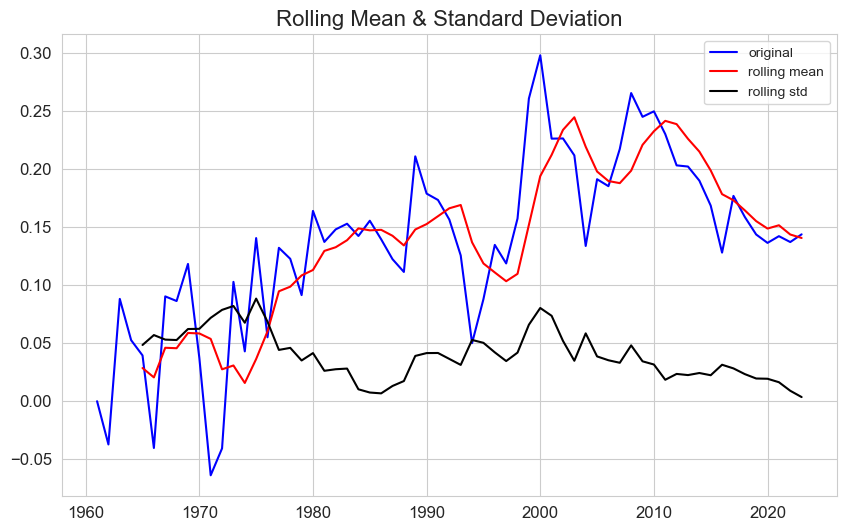

Results of ADF:
Test Statistics                -2.935481
p-value                         0.041375
#Lags Used                      1.000000
Number of observations used    61.000000
Critical Value(1%)             -3.542413
Critical Value(5%)             -2.910236
Critical Value(10%)            -2.592745
dtype: float64


In [404]:
log_minus_exp = df1_logscale - expDecayWeightedAvg
test_stationarity(log_minus_exp)

Dataset is still stationary

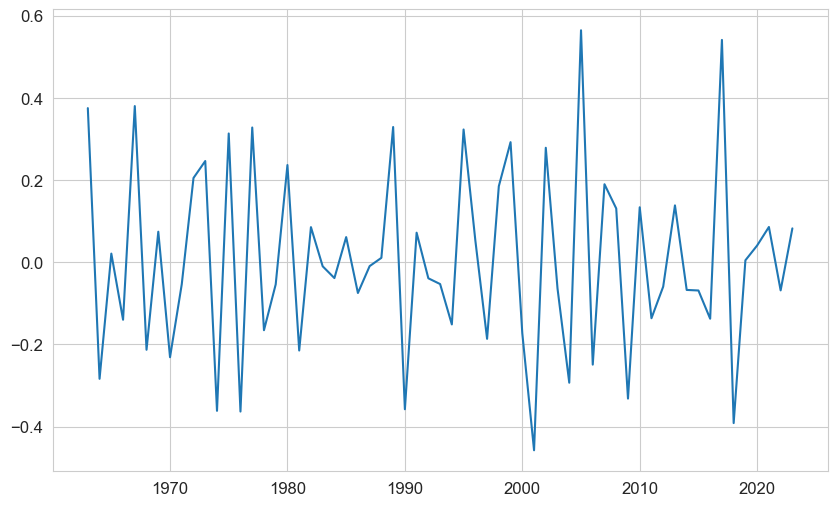

In [406]:
df1_diff_shift = df1_diff - df1_diff.shift()
plt.plot(df1_diff_shift)

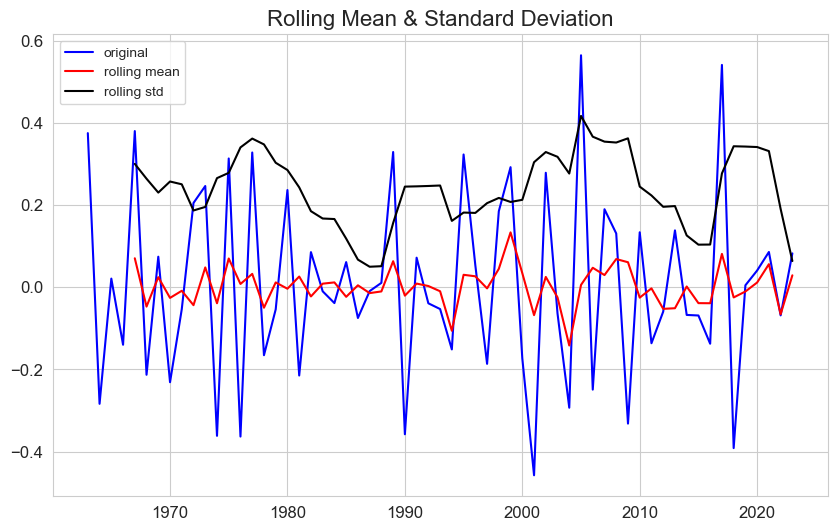

Results of ADF:
Test Statistics               -6.003214e+00
p-value                        1.638545e-07
#Lags Used                     8.000000e+00
Number of observations used    5.200000e+01
Critical Value(1%)            -3.562879e+00
Critical Value(5%)            -2.918973e+00
Critical Value(10%)           -2.597393e+00
dtype: float64


In [407]:
df1_diff_shift.dropna(inplace =True)
test_stationarity(df1_diff_shift)

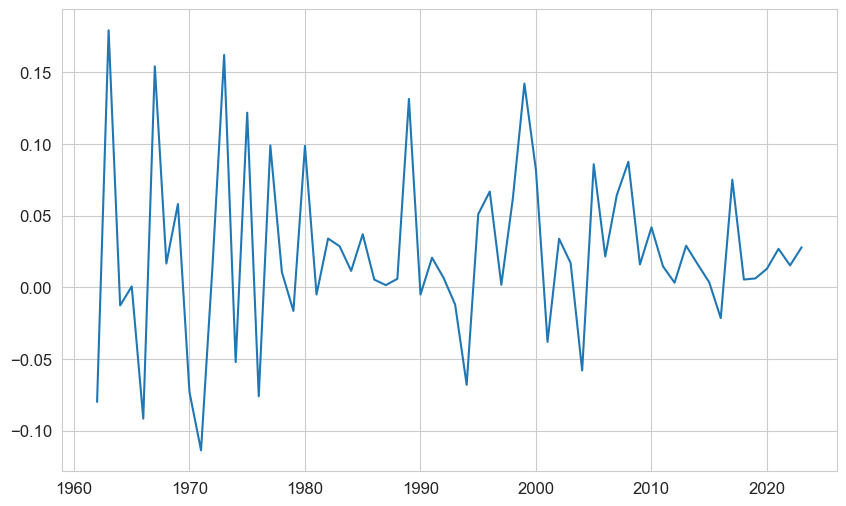

In [408]:
df1_log_shift = df1_logscale - df1_logscale.shift()
plt.plot(df1_log_shift)

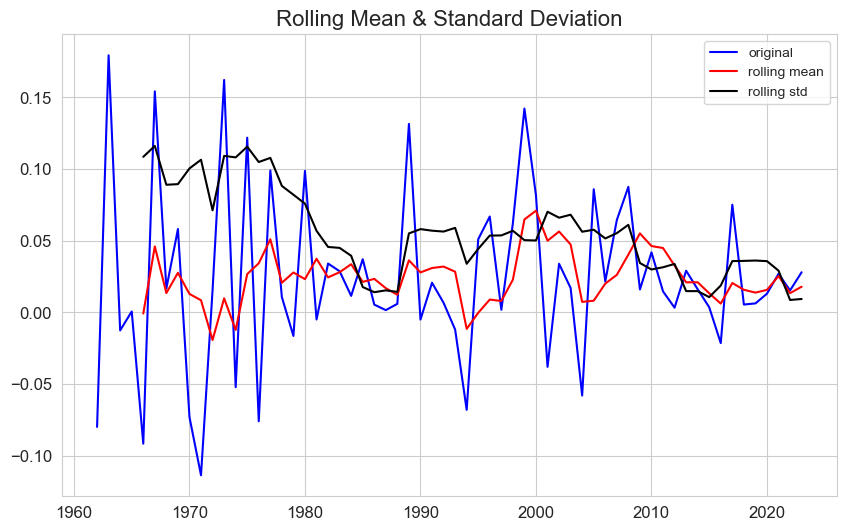

Results of ADF:
Test Statistics               -1.067885e+01
p-value                        3.988330e-19
#Lags Used                     0.000000e+00
Number of observations used    6.100000e+01
Critical Value(1%)            -3.542413e+00
Critical Value(5%)            -2.910236e+00
Critical Value(10%)           -2.592745e+00
dtype: float64


In [409]:
df1_log_shift.dropna(inplace =True)
test_stationarity(df1_log_shift)

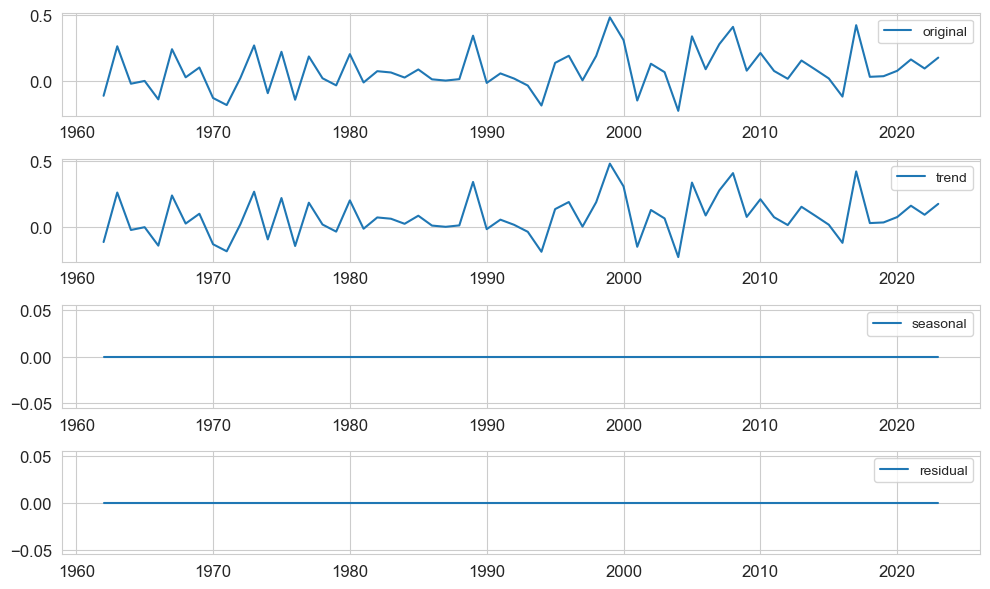

In [410]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1_diff, label = "original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label = "trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label = "seasonal")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label = "residual")
plt.legend(loc="best")

plt.tight_layout()



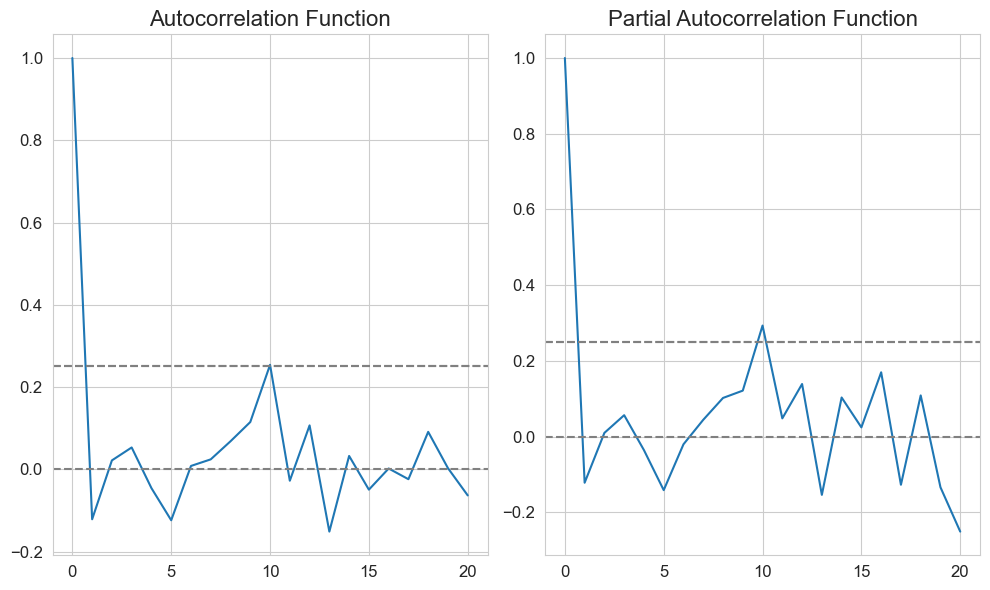

In [411]:
#ACF & PACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df1_diff, nlags=20)
lag_pacf = pacf(df1_diff, nlags=20, method ="ols")

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="grey")
plt.axhline(y=1.96/np.sqrt(len(df1_diff_shift)), linestyle = "--", color ="grey")
plt.axhline(y=1.96/np.sqrt(len(df1_diff_shift)), linestyle = "--", color ="grey")
plt.title("Autocorrelation Function")
#plot ACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="grey")
plt.axhline(y=1.96/np.sqrt(len(df1_diff_shift)), linestyle = "--", color ="grey")
plt.axhline(y=1.96/np.sqrt(len(df1_diff_shift)), linestyle = "--", color ="grey")

plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [412]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df1_diff.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -8.764491408949812
p-value: 2.6198913851134404e-14


In [413]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df1["Production"] is your original data with a datetime index
original_series = df1["Production"]

# Fit ARIMA model on differenced data (adjust p and q based on your ACF/PACF)
model = ARIMA(df1_diff, order=(2, 1, 0))  # Use your p and q values
results = model.fit()


C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


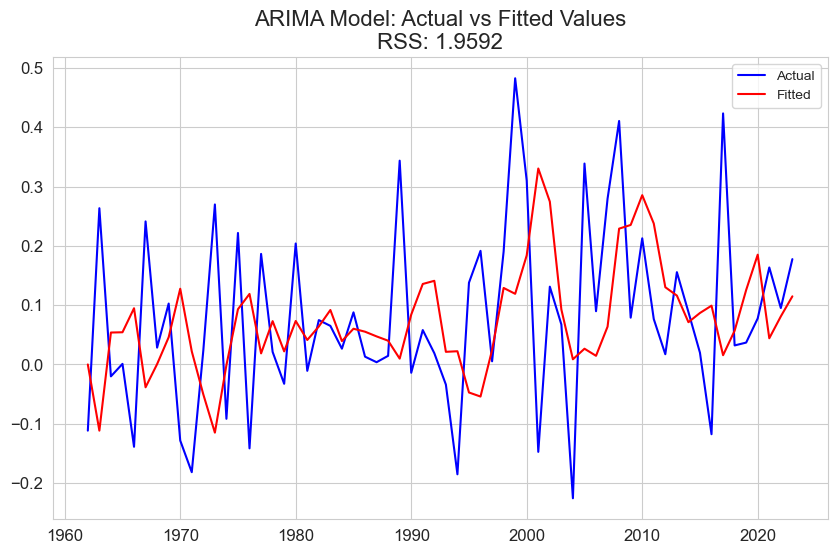

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                   62
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  19.103
Date:                Sun, 09 Feb 2025   AIC                            -32.205
Time:                        15:51:45   BIC                            -25.872
Sample:                    01-01-1962   HQIC                           -29.723
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7760      0.138     -5.631      0.000      -1.046      -0.506
ar.L2         -0.3884      0.135     -2.886      0.004      -0.652      -0.125
sigma2         0.0309      0.006      5.441      0.0

In [414]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


# Calculate Residual Sum of Squares (RSS)
rss = np.sum((results.resid) ** 2)

# Plot the actual vs fitted values
plt.figure(figsize=(10,6))
plt.plot(df1_diff["Production"], label='Actual', color='blue')
plt.plot(results.fittedvalues, label='Fitted', color='red')
plt.title(f'ARIMA Model: Actual vs Fitted Values\nRSS: {rss:.4f}')
plt.legend()
plt.show()
print(results.summary())


In [415]:
# Generate in-sample predictions (starting from 1961)
predictions_diff = results.predict(start=df1_diff.index[0], end=df1_diff.index[-1])

In [416]:
# Forecast next 20 years
n_steps = 20
forecast_diff = results.get_forecast(steps=n_steps).predicted_mean


In [417]:
# Combine predictions and forecast
full_predictions_diff = pd.concat([predictions_diff, forecast_diff])


In [418]:
# Reverse differencing to get predictions in original scale
# Start with the first value of the original series and accumulate differences
full_predictions_original = pd.Series(original_series.iloc[0] + full_predictions_diff.cumsum())

# Prepend the first original value to align dates
full_predictions_original = pd.concat([pd.Series(original_series.iloc[0]), full_predictions_original])


In [419]:
# Generate full date index (1960–2042)
full_dates = pd.date_range(
    start=original_series.index[0], 
    periods=len(original_series) + n_steps, 
    freq='Y'  # Yearly frequency; adjust if needed
)


C:\Users\ACER\AppData\Local\Temp\ipykernel_30616\442903085.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(


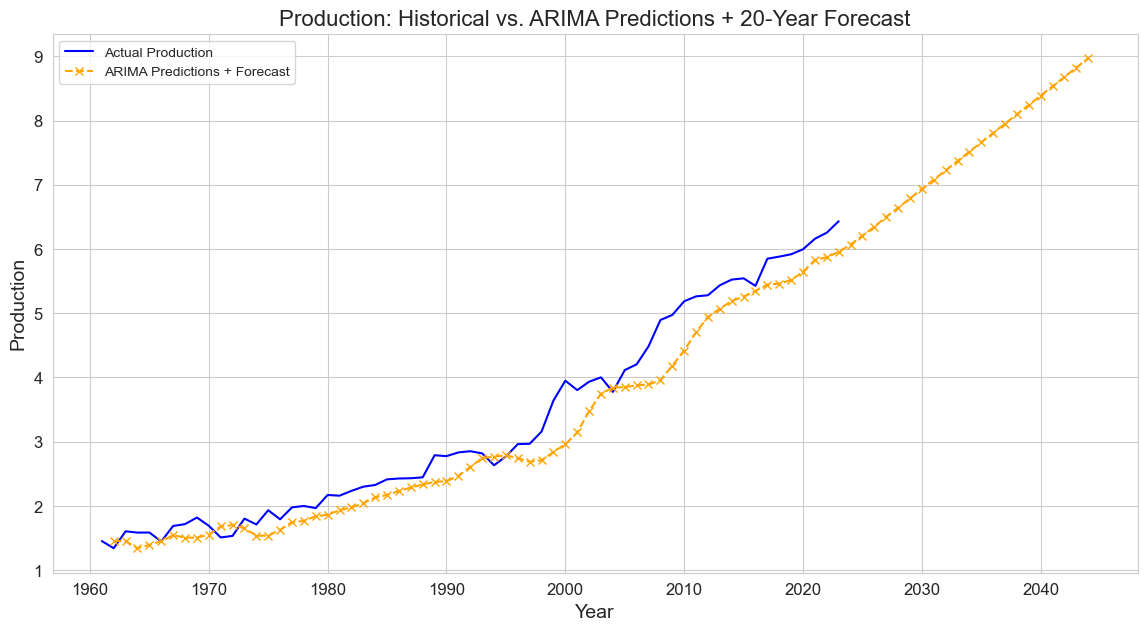

In [420]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(original_series.index, original_series, label='Actual Production', color='blue')
plt.plot(full_dates, full_predictions_original, label='ARIMA Predictions + Forecast', color='orange', linestyle='--',marker="x")
plt.title('Production: Historical vs. ARIMA Predictions + 20-Year Forecast')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

In [421]:
df


Area harvested   Production   Yield  Avg Temp  Avg Max Temp  \
Year                                                                      
1961-01-01       8639332.0  14523696.00  1681.1     25.37         30.18   
1962-01-01       8855818.0  13408128.00  1514.0     25.33         30.49   
1963-01-01       9170275.0  16042664.00  1749.4     25.37         30.44   
1964-01-01       9364054.0  15842004.00  1691.8     25.56         30.34   
1965-01-01       9492394.0  15852140.00  1670.0     25.29         30.22   
...                    ...          ...     ...       ...           ...   
2019-01-01      12302411.0  59185501.11  4810.9     25.64         30.35   
2020-01-01      12232598.0  59962356.15  4901.8     25.40         30.10   
2021-01-01      12521054.0  61597969.20  4919.6     25.74         30.56   
2022-01-01      12496558.0  62549531.82  5005.3     25.76         30.47   
2023-01-01      12466498.0  64325662.39  5159.9     26.00         30.80   

            Avg Min Temp  Avg Rainfall    Fert_con  Cropland_percent  
Year                                                                  
1961-01-01         20.62       2525.33    2.614759          2.112622  
1962-01-01         20.23       2026.93    3.140630          2.151033  
1963-01-01         20.34       2225.09    5.694364          2.112622  
1964-01-01         20.84       2500.06    5.208333          2.151033  
1965-01-01         20.40       2357.30    6.175231          1.997388  
...                  ...           ...         ...               ...  
2019-01-01         20.98       2067.81  320.445463          7.221326  
2020-01-01         20.76       2425.21  325.386565          7.221326  
2021-01-01         20.98       2148.71  395.524245          7.221326  
2022-01-01         21.10       1766.92  390.901244          7.221326  
2023-01-01         21.26       2105.79  370.604018          7.221326  

[63 rows x 9 columns]

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the dataset
df2 = df[['Production', 'Area harvested','Yield', 'Avg Temp', 'Avg Max Temp', 'Avg Min Temp','Avg Rainfall', "Fert_con", "Cropland_percent"]]  # Independent variables
X = df2.drop(columns=["Production"])
y = df2['Production']  # Dependent variable
df2

Production  Area harvested   Yield  Avg Temp  Avg Max Temp  \
Year                                                                      
1961-01-01  14523696.00       8639332.0  1681.1     25.37         30.18   
1962-01-01  13408128.00       8855818.0  1514.0     25.33         30.49   
1963-01-01  16042664.00       9170275.0  1749.4     25.37         30.44   
1964-01-01  15842004.00       9364054.0  1691.8     25.56         30.34   
1965-01-01  15852140.00       9492394.0  1670.0     25.29         30.22   
...                 ...             ...     ...       ...           ...   
2019-01-01  59185501.11      12302411.0  4810.9     25.64         30.35   
2020-01-01  59962356.15      12232598.0  4901.8     25.40         30.10   
2021-01-01  61597969.20      12521054.0  4919.6     25.74         30.56   
2022-01-01  62549531.82      12496558.0  5005.3     25.76         30.47   
2023-01-01  64325662.39      12466498.0  5159.9     26.00         30.80   

            Avg Min Temp  Avg Rainfall    Fert_con  Cropland_percent  
Year                                                                  
1961-01-01         20.62       2525.33    2.614759          2.112622  
1962-01-01         20.23       2026.93    3.140630          2.151033  
1963-01-01         20.34       2225.09    5.694364          2.112622  
1964-01-01         20.84       2500.06    5.208333          2.151033  
1965-01-01         20.40       2357.30    6.175231          1.997388  
...                  ...           ...         ...               ...  
2019-01-01         20.98       2067.81  320.445463          7.221326  
2020-01-01         20.76       2425.21  325.386565          7.221326  
2021-01-01         20.98       2148.71  395.524245          7.221326  
2022-01-01         21.10       1766.92  390.901244          7.221326  
2023-01-01         21.26       2105.79  370.604018          7.221326  

[63 rows x 9 columns]

In [423]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [424]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False) #as it is a time-series data


In [425]:
# Fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [426]:
# Predictions
y_pred = regressor.predict(X_test)


In [427]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6118251832306.011


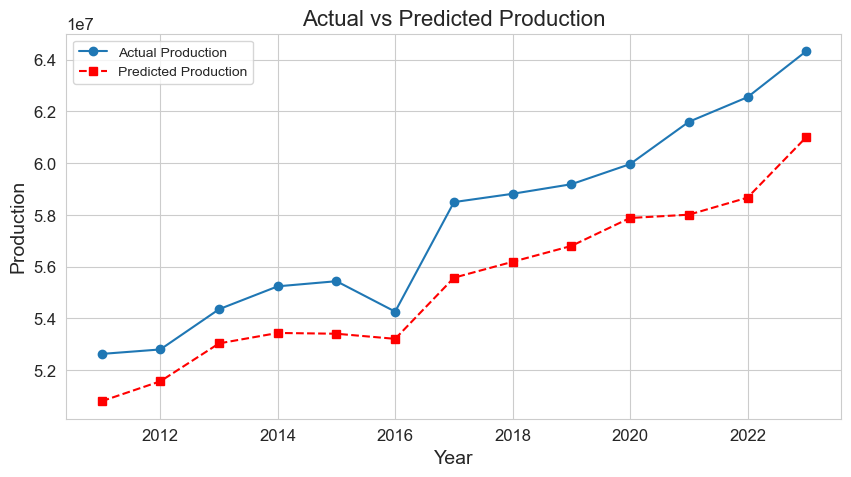

Coefficients: [  7847476.60165731  42739290.42808967 -70212583.39089054
  39783678.59151002  31411762.36950479    146244.57319782
  -4352583.8046035    2213827.36932373]


In [428]:
# Plot the actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Production', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Production', color='red', linestyle='dashed', marker='s')
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

# Inspect coefficients
print("Coefficients:", regressor.coef_)


In [429]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)  # Use the scaled dataset


In [430]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost Model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [431]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)

# Train with best parameters
xgb_best = XGBRegressor(**grid_search.best_params_, objective='reg:squarederror')
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)


Best XGBoost Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}


In [432]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores:", -cv_scores)
print("Average MSE:", -cv_scores.mean())


Cross-validation MSE scores: [2.54899114e+11 1.03739482e+11 8.72720293e+10 8.34313334e+10
 9.63427057e+11]
Average MSE: 298553803248.9251


In [433]:
import numpy as np

y_pred_ensemble = (y_pred + y_pred_rf + y_pred_xgb_best) / 3

# Evaluate ensemble model
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
print(f'Ensemble Model MSE: {ensemble_mse}')


Ensemble Model MSE: 42040434599727.72


In [434]:
print(df2.describe())  # Summary of dataset
df2.corr()  # Correlation matrix


         Production  Area harvested        Yield   Avg Temp  Avg Max Temp  \
count  6.300000e+01    6.300000e+01    63.000000  63.000000     63.000000   
mean   3.294166e+07    1.098701e+07  2908.184127  25.586190     30.362698   
std    1.582296e+07    9.676378e+05  1175.942357   0.317253      0.339498   
min    1.340813e+07    8.639332e+06  1514.000000  24.810000     29.590000   
25%    1.949058e+07    1.039740e+07  1851.250000  25.370000     30.120000   
50%    2.788621e+07    1.103688e+07  2585.800000  25.560000     30.370000   
75%    4.689405e+07    1.173729e+07  4061.700000  25.765000     30.555000   
max    6.432566e+07    1.252105e+07  5159.900000  26.500000     31.460000   

       Avg Min Temp  Avg Rainfall    Fert_con  Cropland_percent  
count     63.000000     63.000000   63.000000         63.000000  
mean      20.859524   2260.037619  131.620771          3.487137  
std        0.349412    270.449600  112.346176          1.782075  
min       20.080000   1641.440000    2.614

Production  Area harvested     Yield  Avg Temp  \
Production          1.000000        0.902655  0.997886  0.410413   
Area harvested      0.902655        1.000000  0.883527  0.422116   
Yield               0.997886        0.883527  1.000000  0.418776   
Avg Temp            0.410413        0.422116  0.418776  1.000000   
Avg Max Temp        0.307618        0.264705  0.317558  0.917971   
Avg Min Temp        0.449277        0.511654  0.454534  0.921846   
Avg Rainfall       -0.264955       -0.179150 -0.268218 -0.051326   
Fert_con            0.981258        0.883400  0.978345  0.375139   
Cropland_percent    0.975695        0.813617  0.976208  0.356669   

                  Avg Max Temp  Avg Min Temp  Avg Rainfall  Fert_con  \
Production            0.307618      0.449277     -0.264955  0.981258   
Area harvested        0.264705      0.511654     -0.179150  0.883400   
Yield                 0.317558      0.454534     -0.268218  0.978345   
Avg Temp              0.917971      0.921846     -0.051326  0.375139   
Avg Max Temp          1.000000      0.692709     -0.204273  0.264988   
Avg Min Temp          0.692709      1.000000      0.102650  0.426827   
Avg Rainfall         -0.204273      0.102650      1.000000 -0.276419   
Fert_con              0.264988      0.426827     -0.276419  1.000000   
Cropland_percent      0.285700      0.373160     -0.294253  0.967167   

                  Cropland_percent  
Production                0.975695  
Area harvested            0.813617  
Yield                     0.976208  
Avg Temp                  0.356669  
Avg Max Temp              0.285700  
Avg Min Temp              0.373160  
Avg Rainfall             -0.294253  
Fert_con                  0.967167  
Cropland_percent          1.000000

In [435]:
# Compute MSE for each model
mse_lr = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb_best)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

# Print results
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"Ensemble Model MSE: {mse_ensemble:.4f}")

# Choose the best model based on lowest MSE
best_model = min(
    [('Linear Regression', mse_lr), 
     ('Random Forest', mse_rf), 
     ('XGBoost', mse_xgb), 
     ('Ensemble', mse_ensemble)], 
    key=lambda x: x[1]
)

print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]:.4f}")


Linear Regression MSE: 6118251832306.0107
Random Forest MSE: 96993531295443.0625
XGBoost MSE: 51836891755316.2656
Ensemble Model MSE: 42040434599727.7188

Best Model: Linear Regression with MSE: 6118251832306.0107


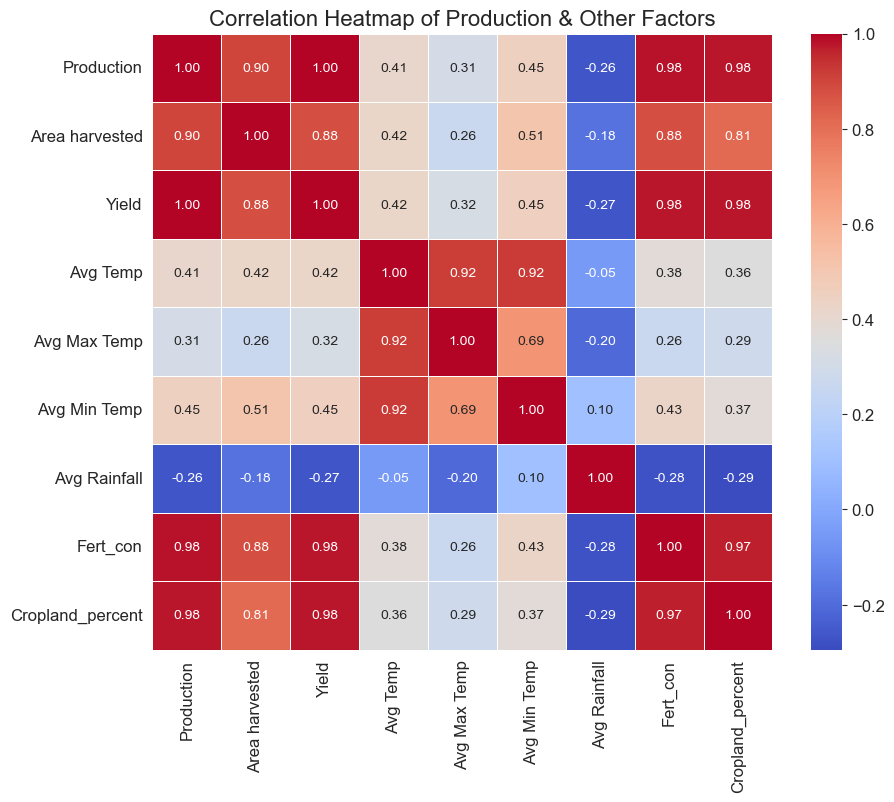

In [436]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Production & Other Factors")
plt.show()


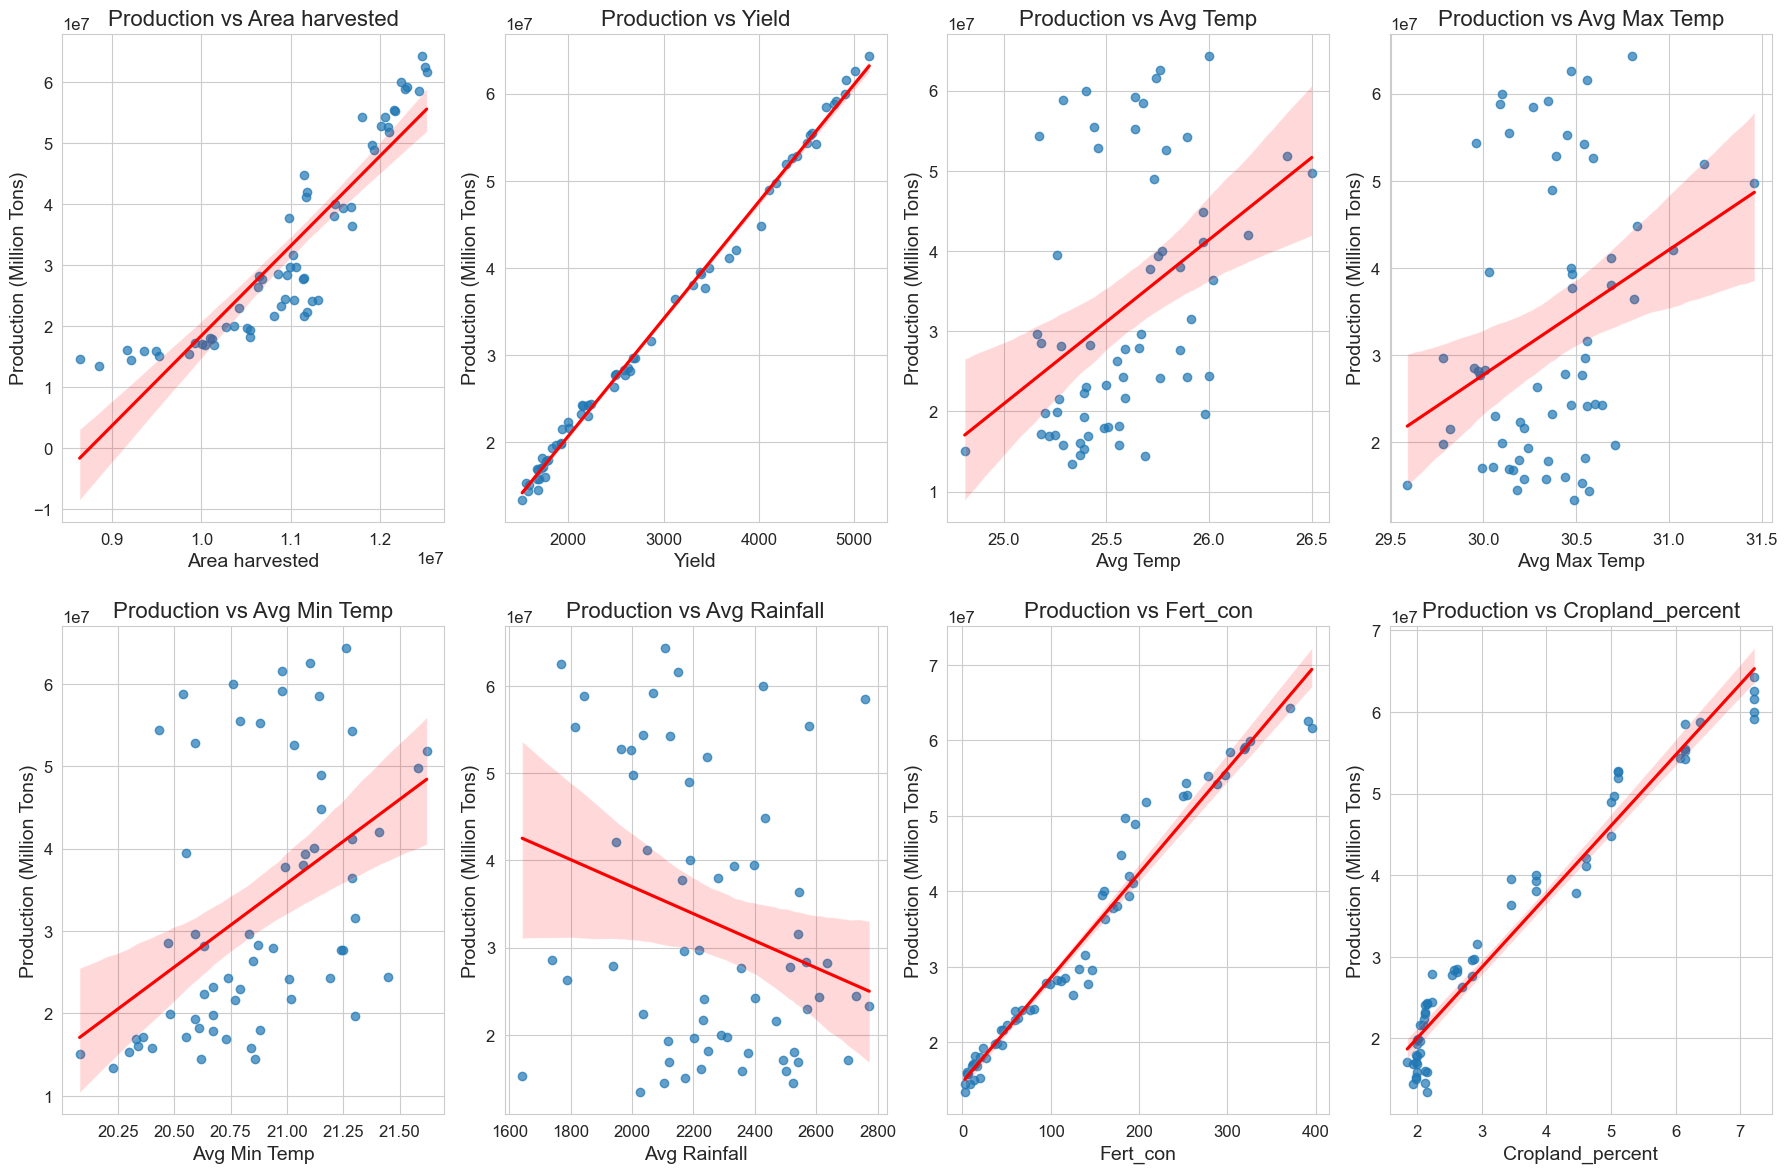

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")
plt.rcParams.update({'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

# Independent variables (excluding Production & Year)
independent_vars = ['Area harvested','Yield', 'Avg Temp', 'Avg Max Temp', 'Avg Min Temp','Avg Rainfall', 'Fert_con', "Cropland_percent"]

# Create scatter plots with regression lines
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(independent_vars):
    sns.regplot(data=df2, x=var, y='Production', ax=axes[i], scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
    axes[i].set_title(f"Production vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Production (Million Tons)")

plt.tight_layout()
plt.show()



<Axes: xlabel='Fert_con', ylabel='Yield'>

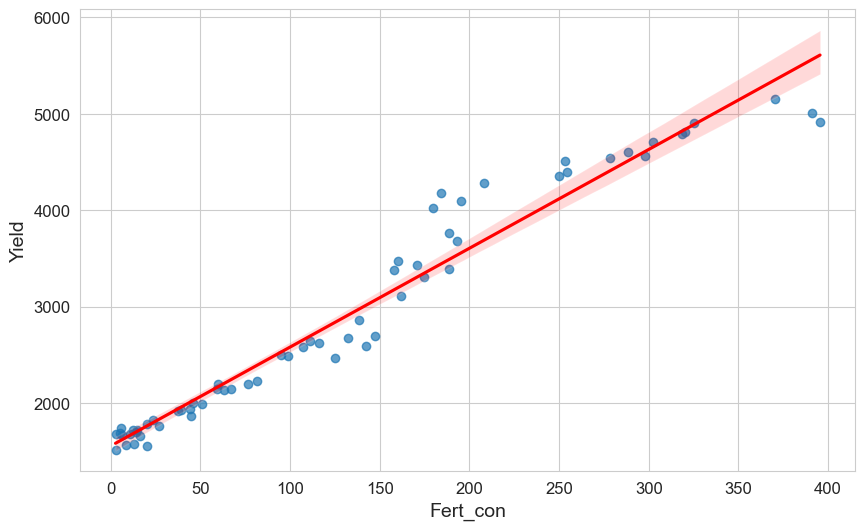

In [438]:
sns.regplot(data=df2, x="Fert_con", y="Yield",scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

<Axes: xlabel='Cropland_percent', ylabel='Yield'>

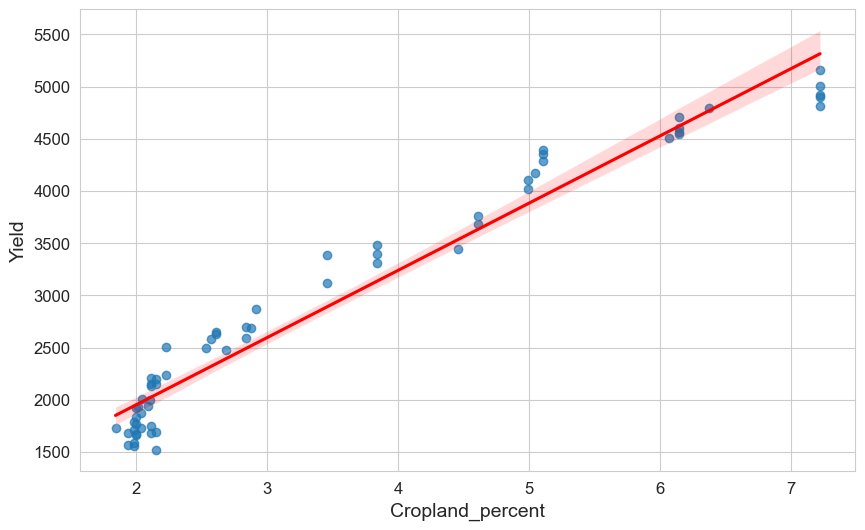

In [439]:
sns.regplot(data=df2, x="Cropland_percent", y="Yield",scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

In [440]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

def ols_diagnostics(df, dependent_var, independent_vars):

    # Fit OLS Regression Model
    X = sm.add_constant(df[independent_vars])  # Add intercept
    y = df[dependent_var]
    model = sm.OLS(y, X).fit()
    
    print("\nOLS Regression Summary ")
    print(model.summary())

    #Assumption Tests

    # Normality of Residuals - Histogram & Shapiro-Wilk Test
    residuals = model.resid
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title("Residuals Histogram")
    plt.show()
    
    shapiro_test = shapiro(residuals)
    print("\n Shapiro-Wilk Test for Normality ")
    print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals are normally distributed (fail to reject H0).")
    else:
        print("Residuals are NOT normally distributed (reject H0).")

    # Homoscedasticity - Breusch-Pagan Test
    _, pval, _, _ = het_breuschpagan(residuals, X)
    print("\nBreusch-Pagan Test for Homoscedasticity ")
    print(f"p-value = {pval:.4f}")
    if pval > 0.05:
        print("Homoscedasticity present (fail to reject H0).")
    else:
        print("Heteroscedasticity detected (reject H0).")

    # Multicollinearity - Variance Inflation Factor (VIF)
    print("\nVariance Inflation Factor (VIF) for Multicollinearity")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_vars
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(len(independent_vars))]  # +1 to skip constant
    print(vif_data)
    
    # Independence of Errors - Durbin-Watson Test
    durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
    print("\n Durbin-Watson Test for Autocorrelation")
    print(f"Durbin-Watson Statistic = {durbin_watson_stat:.4f}")
    if 1.5 < durbin_watson_stat < 2.5:
        print("No serious autocorrelation detected.")
    else:
        print("Possible autocorrelation detected.")

    return model


OLS Regression Summary 
                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7209.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           6.68e-79
Time:                        15:52:11   Log-Likelihood:                -913.54
No. Observations:                  63   AIC:                             1845.
Df Residuals:                      54   BIC:                             1864.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const          

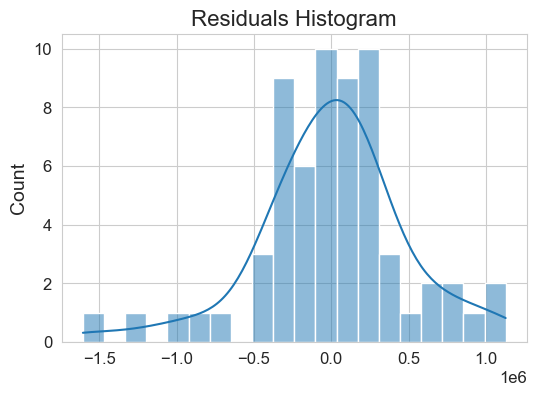


 Shapiro-Wilk Test for Normality 
Statistic = 0.9545, p-value = 0.0205
Residuals are NOT normally distributed (reject H0).

Breusch-Pagan Test for Homoscedasticity 
p-value = 0.0095
Heteroscedasticity detected (reject H0).

Variance Inflation Factor (VIF) for Multicollinearity
           Variable          VIF
0    Area harvested     7.220647
1             Yield    51.218635
2          Avg Temp  8762.465983
3      Avg Max Temp  2540.380605
4      Avg Min Temp  2645.029005
5      Avg Rainfall     1.454382
6          Fert_con    31.755913
7  Cropland_percent    36.857873

 Durbin-Watson Test for Autocorrelation
Durbin-Watson Statistic = 1.0683
Possible autocorrelation detected.


In [441]:
ols_diagnostics(df2, "Production",['Area harvested','Yield', 'Avg Temp', 'Avg Max Temp', 'Avg Min Temp','Avg Rainfall', "Fert_con", "Cropland_percent" ])

In [442]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5).fit(X, y)
print(f"Selected Features: {X.columns[lasso.coef_ != 0]}")


Selected Features: Index(['Area harvested'], dtype='object')



OLS Regression Summary 
                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2245.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           3.62e-65
Time:                        15:52:12   Log-Likelihood:                -954.99
No. Observations:                  63   AIC:                             1926.
Df Residuals:                      55   BIC:                             1943.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const          

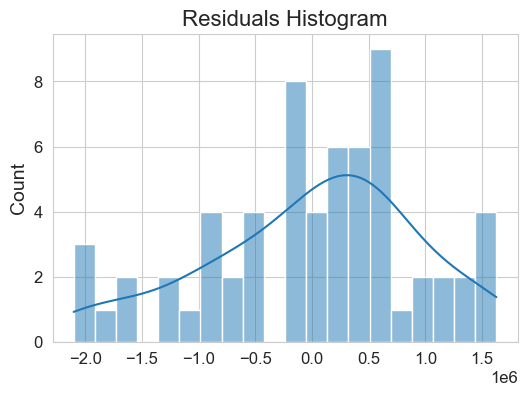


 Shapiro-Wilk Test for Normality 
Statistic = 0.9641, p-value = 0.0629
Residuals are normally distributed (fail to reject H0).

Breusch-Pagan Test for Homoscedasticity 
p-value = 0.1874
Homoscedasticity present (fail to reject H0).

Variance Inflation Factor (VIF) for Multicollinearity
           Variable          VIF
0             Yield    40.239410
1          Avg Temp  8757.998060
2      Avg Max Temp  2539.535420
3      Avg Min Temp  2642.874460
4      Avg Rainfall     1.454355
5          Fert_con    28.099072
6  Cropland_percent    28.120606

 Durbin-Watson Test for Autocorrelation
Durbin-Watson Statistic = 0.7716
Possible autocorrelation detected.


In [443]:
ols_diagnostics(df2, "Production",['Yield', 'Avg Temp', 'Avg Max Temp', 'Avg Min Temp','Avg Rainfall', "Fert_con", "Cropland_percent" ])